In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import scipy as sp

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import math





Simularemos procesos que tienen raíces unitarias, es decir procesos con tendecía estocástica.Veamos el primer ejemplo:<br>
$(1-B)(1-0.5B)X_{t}=(X_t-1.5X_{t-1}+0.5X_{t-2})=Z_{t}$, esto corresponde a un proceso ARIMA(1,1,0)

1

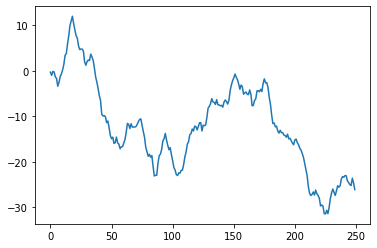

In [3]:

Tlength=250
arparams = np.array([-1.5, 0.5])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y1 = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y1)
y1.ndim
#plt.savefig('ARIMA.pdf')

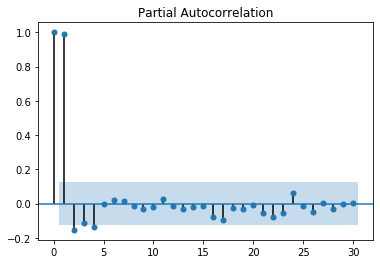

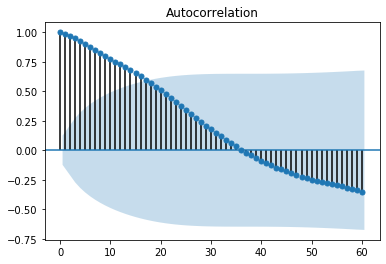

In [4]:
graph1=plot_pacf(y1,lags=30,method='ldbiased')###Note que parece un AR(2)
graph2=plot_acf(y1,lags=60,unbiased=False)


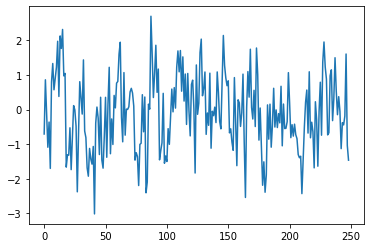

In [5]:
diffy1=np.diff(y1,n=1)#### n es el orden de integración del procesos ARIMA, es decir, d.
plt.plot(diffy1)
#plt.savefig('TSTU25.pdf')

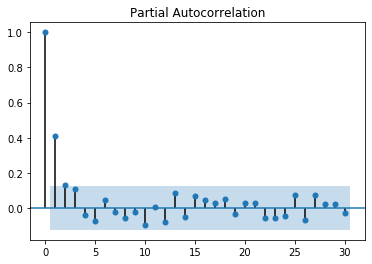

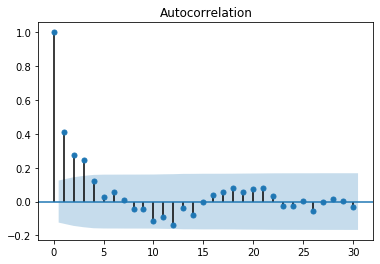

In [6]:
graph1=plot_pacf(diffy1,lags=30,method='ldbiased')
graph2=plot_acf(diffy1,lags=30,unbiased=False)

In [7]:

modeloarima1=smapi.tsa.statespace.SARIMAX(y1, trend='n', order=(1,1,0))
ajustearima=modeloarima1.fit()
ajustearima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -348.756
Date:                Fri, 20 Nov 2020   AIC                            701.511
Time:                        06:04:56   BIC                            708.546
Sample:                             0   HQIC                           704.343
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4171      0.062      6.775      0.000       0.296       0.538
sigma2         0.9633      0.099      9.758      0.000       0.770       1.157
===================================================================================
Ljung-Box (Q):                       32.87   Jarque-Bera (JB):                 2.38
Prob(Q):                              0.78   Prob(JB):                         0.30
Heteroskedasticity (H):               0.82   Skew:                            -0.01
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Tenemos, caminata Aleatoria con drift, es decir, 
$X_{t}=c+X_{t-1}+Z_{t}$ y Caminata Aleatoria alrededor de una recta $X_{t}=c+\beta t+Z_{t}$

In [8]:
inic=50
c=1
beta=1.1
tiempo=np.arange(1, Tlength+inic+2, 1)
#xt=beta*tiempo

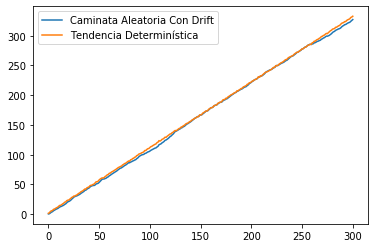

In [9]:
Zt=np.random.normal(0,0.5,Tlength+inic+1)###Cambiar los valores de la varianza
Xtdrift=np.zeros(Tlength+inic+1)
XtRWlin=np.zeros(Tlength+inic+1)
for t in range(Tlength+inic+1):
    Xtdrift[t]=c+Xtdrift[t-1]+Zt[t]###Caminata Aleatoria con Drift
    #XtRWlin[t]=c+beta*tiempo[t]+XtRWlin[t-1]+Zt[t]###Caminata aleatoria alrededor de una recta
    XtRWlin[t]=c+beta*tiempo[t]+Zt[t]###Modelo con tendencia determinística


plt.plot(Xtdrift,label='Caminata Aleatoria Con Drift')
plt.plot(XtRWlin,label='Tendencia Determinística')
plt.legend()
#plt.show()
#plt.savefig('ARIMADriftDetermin.pdf')

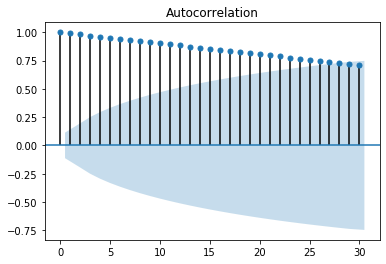

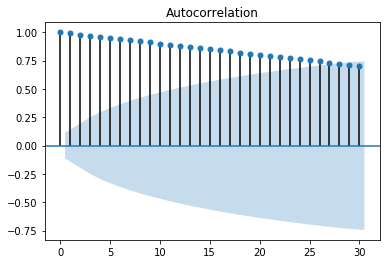

In [10]:
fig1=plot_acf(Xtdrift,lags=30,unbiased=False)
fig2=plot_acf(XtRWlin,lags=30,unbiased=False)
#plt.savefig('TSTU24.pdf')

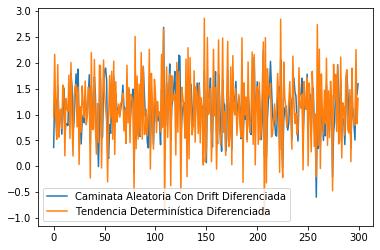

In [11]:
diffXtdrift=np.diff(Xtdrift,n=1)
diffXtRWlin=np.diff(XtRWlin,n=1)
plt.plot(diffXtdrift,label='Caminata Aleatoria Con Drift Diferenciada')
plt.plot(diffXtRWlin,label='Tendencia Determinística Diferenciada')
plt.legend()
#plt.savefig('TSTU28.pdf')

Consideremos un modelo autoregresivo que tiene raíces unitarias en $z=\exp(i\theta)$ y en su conjugada $z=\exp(-i\theta)$. Note que esas raíces están sobre el círculo unitario, es decir debe producir un proceso que es no estacionario. Es decir, el modelo que vamos a cosiderar es de la forma $(1-\exp(i\theta)B)(1-\exp(-i\theta)B)=Z_t$, el cual es equivalente a $(1-2\cos\theta B+B^2)X_t=Z_t$.Escojamos el valor de $\theta=\frac{\pi}{3}$.

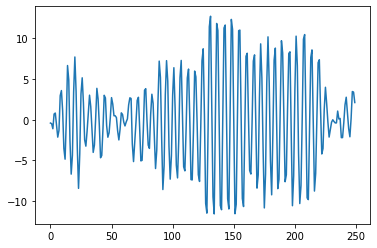

In [12]:

theta=(math.pi)/3
Tlength=250
arparams = np.array([-2*math.cos(theta),1])
#maparams = np.array([.65, .35])
ar = np.r_[1, arparams] # add zero-lag 
ma = np.r_[1] # add zero-lag y maparams tiene los otros parámetros
y2 = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength)
plt.plot(y2)####Note el comportamiento periodico

#plt.savefig('TSTU26.pdf')

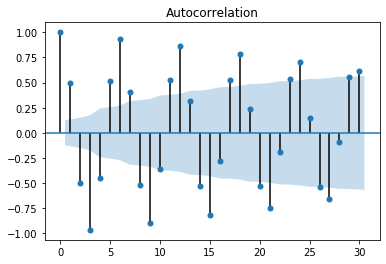

In [13]:
fig1=plot_acf(y2,lags=30,unbiased=False)
#plt.savefig('TSTU27.pdf')

Prueba de Dickey Fuller, en diferentes escenarios.

In [14]:
from statsmodels.tsa.stattools import adfuller
help(adfuller)

Help on function adfuller in module statsmodels.tsa.stattools:

adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
    Augmented Dickey-Fuller unit root test.
    
    The Augmented Dickey-Fuller test can be used to test for a unit root in a
    univariate process in the presence of serial correlation.
    
    Parameters
    ----------
    x : array_like, 1d
        The data series to test.
    maxlag : int
        Maximum lag which is included in test, default 12*(nobs/100)^{1/4}.
    regression : {'c','ct','ctt','nc'}
        Constant and trend order to include in regression.
    
        * 'c' : constant only (default).
        * 'ct' : constant and trend.
        * 'ctt' : constant, and linear and quadratic trend.
        * 'nc' : no constant, no trend.
    
    autolag : {'AIC', 'BIC', 't-stat', None}
        Method to use when automatically determining the lag.
    
        * if None, then maxlag lags are used.
        * if 'AIC' (default) or 

In [15]:
resultadoadf=adfuller(y1,regression="nc",autolag=None, maxlag=1)####maxlag es importante
#resultadoadf=adfuller(y1,maxlag=3,autolag=None,regression="nc")
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(y1,regression="nc",maxlag=1,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
#pvalue
  
###Al no rechazarse la hipótesis nula implica que existe raíz unitaria.

ADF Statistic: 0.035478
P-value: 0.695956
	1%: -2.575
	5%: -1.942
	10%: -1.616


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.174
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              25.87
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                    6.33e-11
Time:                        06:05:32   Log-Likelihood:                         -347.55
No. Observations:                 248   AIC:                                      699.1
Df Residuals:                     246   BIC:                                      706.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0001      0.004      0.035      0.972      -0.008       0.008
x2             0.4178      0.058      7.147      0.000       0.303       0.533
==============================================================================
Omnibus:                        3.489   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.408
Skew:                          -0.021   Prob(JB):                        0.300
Kurtosis:                       2.519   Cond. No.                         14.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
%qtconsole

ADF Statistic: -0.027385
P-value: 0.956208
	1%: -3.453
	5%: -2.872
	10%: -2.572


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     23.10
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           6.15e-37
Time:                        06:05:41   Log-Likelihood:                -206.86
No. Observations:                 288   AIC:                             441.7
Df Residuals:                     274   BIC:                             493.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -8.982e-06      0.000     -0.027      0.978      -0.001       0.001
x2            -0.9715      0.060    -16.116      0.000      -1.090      -0.853
x3            -0.8671      0.084    -10.346      0.000      -1.032      -0.702
x4            -0.8492      0.097     -8.717      0.000      -1.041      -0.657
x5            -0.8635      0.108     -7.994      0.000      -1.076      -0.651
x6            -0.7442      0.116     -6.429      0.000      -0.972      -0.516
x7            -0.5727      0.118     -4.845      0.000      -0.805      -0.340
x8            -0.6371      0.118     -5.386      0.000      -0.870      -0.404
x9            -0.5404      0.116     -4.656      0.000      -0.769      -0.312
x10           -0.3697      0.109     -3.403      0.001      -0.584      -0.156
x11           -0.3048      0.098     -3.106      0.002      -0.498      -0.112
x12           -0.1390      0.084     -1.651      0.100      -0.305       0.027
x13           -0.0637      0.060     -1.054      0.293      -0.183       0.055
const          8.7204      1.005      8.678      0.000       6.742      10.699
==============================================================================
Omnibus:                        2.648   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.326
Skew:                          -0.190   Prob(JB):                        0.313
Kurtosis:                       3.221   Cond. No.                     6.81e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

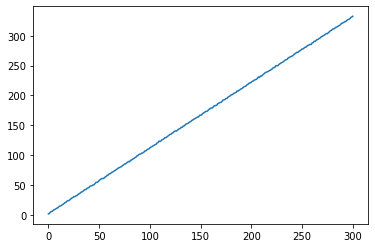

In [17]:
###serie con tendencia determinística
fig1=plt.plot(XtRWlin)
resultadoadfxtrwlin=adfuller(XtRWlin,regression='c',autolag=None,maxlag=12)
print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(XtRWlin,regression='c',autolag=None,maxlag=12,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()

ADF Statistic: -0.758854
P-value: 0.830911
	1%: -3.453
	5%: -2.872
	10%: -2.572


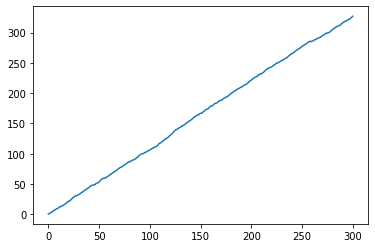

In [18]:
###serie con tendencia estocástica pero alrededor de una linea recta
fig1=plt.plot(Xtdrift)
#resultadoadfxtrwlin=adfuller(Xtdrift,regression="nc",autolag=None,maxlag=10)
resultadoadfxtrwlin=adfuller(Xtdrift,regression='c',autolag=None,maxlag=10)


print('ADF Statistic: %f' % resultadoadfxtrwlin[0])
print('P-value: %f' % resultadoadfxtrwlin[1])
for key, value in resultadoadfxtrwlin[4].items():
    print('\t%s: %.3f' % (key, value))

# Ejemplo de la serie de pasajeros

In [19]:

data = pd.read_csv('/Users/sergiocalderon/Documents/GitHub/TimeSeries/Bases de Datos/AirPassengers.csv')
print(data)
print('\n Data Types:')
print(data.dtypes)

       Month  NPassengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

 Data Types:
Month          object
NPassengers     int64
dtype: object


pandas.core.series.Series

pandas.core.frame.DataFrame

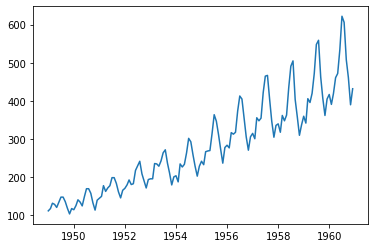

In [20]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
#####La otra forma es crear el índice de los datos
pasajeros=data.set_index('Month')
tsAirP = pasajeros['NPassengers']
plt.plot(tsAirP)
#plt.savefig('TSTU29.pdf')
type(tsAirP)
type(pasajeros)

Transformación Box-Cox $$f_{\lambda}(u_{t})= \left\{ \begin{array}{lc}
            \lambda^{-1}(u^{\lambda}_{t}-1)&  \ \lambda>0, u_{t} \geq 0\\             \ln(u_{t}) & u_{t}>0,\lambda=0.
             \end{array}
   \right. $$ 

In [21]:

###Chequear si hay necesidad de estabilizar varianza
sertrans,lambdaest,intlambda=sp.stats.boxcox(tsAirP,alpha=0.05)
lambdaest  ###Valor de lambda
intlambda  ###Intervalo donde posiblemente éste lambda

0.14802265137037945

(-0.23789863644607392, 0.533711499804654)

In [22]:
#help(sp.stats.boxcox)

numpy.ndarray

Text(0.5, 1.0, 'Transformación logarítmica Serie Pasajeros')

Text(0.5, 1.0, 'Serie de Pasajeros Original')

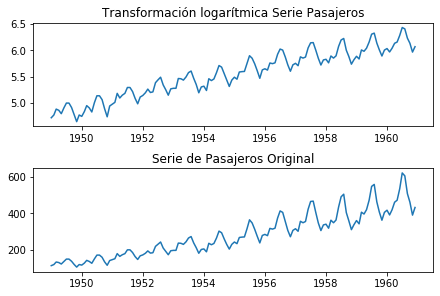

In [23]:
logAirp=sp.stats.boxcox(data['NPassengers'],lmbda=0)
type(logAirp)
data = data.assign(logAirp=logAirp)   

logpasajeros=data.set_index('Month')   
logAirPass=  logpasajeros['logAirp'] 
f, (ax1, ax2) = plt.subplots(ncols=1, nrows=2,constrained_layout=True)
ax1.plot(logAirPass)
ax1.set_title('Transformación logarítmica Serie Pasajeros')
ax2.plot(tsAirP)
ax2.set_title('Serie de Pasajeros Original')
#plt.savefig('TSTU30.pdf')


In [24]:
from statsmodels.tsa.stattools import adfuller
resultadoadf=adfuller(logAirPass,regression="nc",autolag=None, maxlag=12)####maxlag es importante
##Se debe elegir un lagmax grande y ver si el valor t de el último coeficiente de la variable
###Diferenciada es significativo(>1.6 en valor absoluto), si así lo es se lleva a cabo el test de Dickey Fuller
###Si no lo es, hay que reducir el rezago.
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))

adfstat, pvalue, critvalues, resstore=adfuller(logAirPass,regression="nc",maxlag=12,autolag=None,store=True,regresults=True)####maxlag es importante
resstore.resols.summary()
pvalue

ADF Statistic: 3.787199
P-value: 0.999999
	1%: -2.583
	5%: -1.943
	10%: -1.615


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.856
Model:                            OLS   Adj. R-squared (uncentered):              0.841
Method:                 Least Squares   F-statistic:                              54.14
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                    2.06e-43
Time:                        06:07:15   Log-Likelihood:                          232.93
No. Observations:                 131   AIC:                                     -439.9
Df Residuals:                     118   BIC:                                     -402.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0054      0.001      3.787      0.000       0.003       0.008
x2            -0.1988      0.072     -2.758      0.007      -0.342      -0.056
x3            -0.2737      0.073     -3.734      0.000      -0.419      -0.129
x4            -0.2336      0.072     -3.233      0.002      -0.377      -0.091
x5            -0.2931      0.074     -3.965      0.000      -0.440      -0.147
x6            -0.2066      0.072     -2.867      0.005      -0.349      -0.064
x7            -0.2669      0.071     -3.734      0.000      -0.408      -0.125
x8            -0.2345      0.072     -3.264      0.001      -0.377      -0.092
x9            -0.3274      0.073     -4.473      0.000      -0.472      -0.182
x10           -0.1985      0.074     -2.696      0.008      -0.344      -0.053
x11           -0.2799      0.073     -3.850      0.000      -0.424      -0.136
x12           -0.1761      0.073     -2.412      0.017      -0.321      -0.032
x13            0.6274      0.073      8.632      0.000       0.483       0.771
==============================================================================
Omnibus:                        7.013   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.374
Skew:                           0.397   Prob(JB):                       0.0250
Kurtosis:                       3.849   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.9999992645720288

## Diferenciación de la serie porque hay presencia de una raíz Unitaria

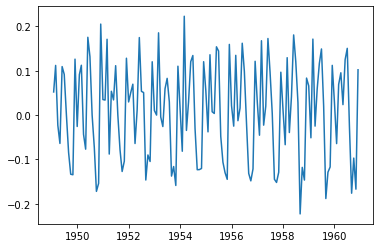

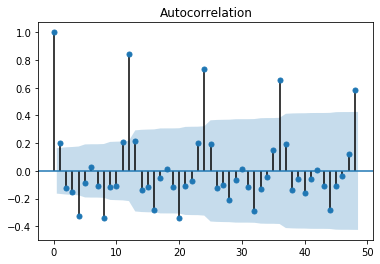

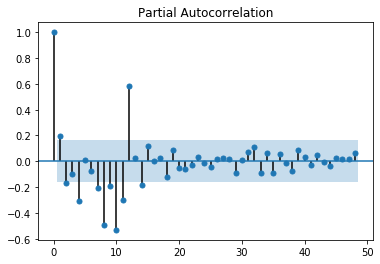

In [25]:
logdiff_1=logAirPass.diff(periods=1)[1:]
plt.plot(logdiff_1)
###Ahora procedemos a ajustar un modelo ARMA a la serie diferenciada
acf1=plot_acf(logdiff_1,lags=48,unbiased=False)
pacf1=plot_pacf(logdiff_1,lags=48,method='ldbiased')####Note que el  máximo orden p=12

Se vuelve a aplicar la prueba de Dickey-Fuller para ver si aún hay presencia de una raíz unitaria

In [26]:
resultadoadf=adfuller(logdiff_1,regression="nc",maxlag=10,autolag=None)####maxlag es importante
print('ADF Statistic: %f' % resultadoadf[0])
print('P-value: %f' % resultadoadf[1])
for key, value in resultadoadf[4].items():
    print('\t%s: %.3f' % (key, value))
    
adfstat, pvalue, critvalues, resstore=adfuller(logdiff_1,regression="nc",maxlag=10,autolag=None,store=True,regresults=True)####maxlag es importante
pvalue
resstore.resols.summary()

ADF Statistic: -7.327340
P-value: 0.000000
	1%: -2.583
	5%: -1.943
	10%: -1.615


1.1107234531299698e-11

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.689
Model:                            OLS   Adj. R-squared (uncentered):              0.661
Method:                 Least Squares   F-statistic:                              24.39
Date:                Fri, 20 Nov 2020   Prob (F-statistic):                    9.29e-26
Time:                        06:07:37   Log-Likelihood:                          153.49
No. Observations:                 132   AIC:                                     -285.0
Df Residuals:                     121   BIC:                                     -253.3
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -3.7435      0.511     -7.327      0.000      -4.755      -2.732
x2             2.7497      0.454      6.056      0.000       1.851       3.649
x3             2.3346      0.420      5.556      0.000       1.503       3.167
x4             2.2244      0.367      6.065      0.000       1.498       2.951
x5             1.6739      0.341      4.906      0.000       0.998       2.349
x6             1.5583      0.293      5.315      0.000       0.978       2.139
x7             1.2121      0.256      4.736      0.000       0.705       1.719
x8             1.0805      0.202      5.339      0.000       0.680       1.481
x9             0.5095      0.175      2.916      0.004       0.164       0.855
x10            0.4164      0.124      3.350      0.001       0.170       0.662
x11           -0.0227      0.092     -0.247      0.806      -0.205       0.160
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.861
Skew:                          -0.088   Prob(JB):                        0.650
Kurtosis:                       2.645   Cond. No.                         29.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Arima automático

In [27]:
from pmdarima.arima import auto_arima
auto = auto_arima(logdiff_1, error_action='ignore',max_p=12 ,max_q=12,max_order=12,seasonal=False, m=12,information_criterion='bic')
auto.summary()

/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:                     ARMA(2, 2)   Log Likelihood                 149.640
Method:                       css-mle   S.D. of innovations              0.084
Date:                Fri, 20 Nov 2020   AIC                           -287.281
Time:                        06:07:51   BIC                           -269.504
Sample:                             0   HQIC                          -280.057
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0096      0.003      3.697      0.000       0.005       0.015
ar.L1.y        1.6293      0.039     41.868      0.000       1.553       1.706
ar.L2.y       -0.8946      0.039    -23.127      0.000      -0.970      -0.819
ma.L1.y       -1.8270      0.036    -51.303      0.000      -1.897      -1.757
ma.L2.y        0.9245      0.036     25.568      0.000       0.854       0.995
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9106           -0.5372j            1.0573           -0.0848
AR.2            0.9106           +0.5372j            1.0573            0.0848
MA.1            0.9881           -0.3245j            1.0400           -0.0505
MA.2            0.9881           +0.3245j            1.0400            0.0505
-----------------------------------------------------------------------------
"""

# Ajuste del modelo

In [28]:

####Ajuste del modelo
modelofinal = sm.tsa.statespace.sarimax.SARIMAX(logAirPass, trend='c',order=(12,1,0))  
results_final = modelofinal.fit()####useboxcox=
print(results_final.summary())



/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/sergiocalderon/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                logAirp   No. Observations:                  144
Model:              SARIMAX(12, 1, 0)   Log Likelihood                 246.464
Date:                Fri, 20 Nov 2020   AIC                           -464.929
Time:                        06:08:00   BIC                           -423.449
Sample:                    01-01-1949   HQIC                          -448.073
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0319      0.007      4.462      0.000       0.018       0.046
ar.L1         -0.2141      0.068     -3.161      0.002      -0.347      -0.081
ar.L2         -0.2755      0.066     -4.156      0.0

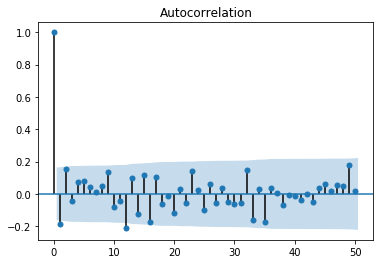

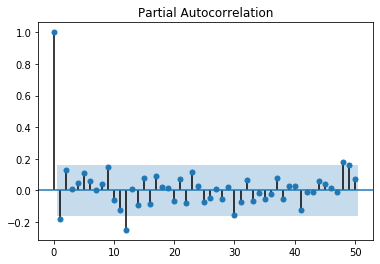

In [29]:
#results_final.standardized_forecasts_error.reshape(144,)
fig1=plot_acf(results_final.standardized_forecasts_error.reshape(144,),lags=50,unbiased=False)
fig2=plot_pacf(results_final.standardized_forecasts_error.reshape(144,),lags=50,method='ldbiased')



array([[0.50878217, 0.02104538]])

array([[6.12175438, 0.04684658, 0.30942196, 3.80278235]])

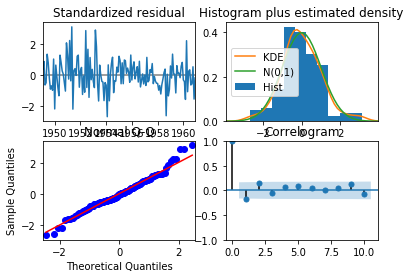

In [30]:
#####Análisis de Residuales######
residuales=results_final.resid####Residuales no estandarizados

graf_resid=results_final.plot_diagnostics()
#plt.show()
## Hipótesis nula de no heterocedasticidad
results_final.test_heteroskedasticity(method='breakvar') #[Est. de prueba, p-valor]
## Hipótesis nula de normalidad
results_final.test_normality(method='jarquebera')
#1. Estadística de prueba
#2. El p valor
#3. Sesgo estimado de los datos
#4. Curtosis estimada
## Hipótesis nula indica que no se presenta correlación serial




In [31]:
results_final.test_serial_correlation(method='ljungbox')
###Primero, valor de la estadística, luego valor p.


array([[[4.92728633e+00, 8.56030823e+00, 8.83519043e+00, 9.62082839e+00,
         1.05800214e+01, 1.08268857e+01, 1.08494927e+01, 1.12115975e+01,
         1.40445917e+01, 1.50157542e+01, 1.53061249e+01, 2.24589425e+01,
         2.40341348e+01, 2.66001620e+01, 2.87322882e+01, 3.37676586e+01,
         3.56558590e+01, 3.62918753e+01, 3.63128906e+01, 3.85402154e+01,
         3.87096893e+01, 3.91995037e+01, 4.25947338e+01, 4.26838388e+01,
         4.44827847e+01, 4.50932207e+01, 4.56397078e+01, 4.58567751e+01,
         4.63000630e+01, 4.69890572e+01, 4.75661940e+01, 5.15598028e+01,
         5.65466774e+01, 5.67348029e+01, 6.24765040e+01, 6.27755932e+01,
         6.27804764e+01, 6.36297714e+01, 6.36384447e+01, 6.36590376e+01],
        [2.64357998e-02, 1.38405289e-02, 3.15643027e-02, 4.73228347e-02,
         6.03729387e-02, 9.38763697e-02, 1.45320146e-01, 1.89995633e-01,
         1.20747834e-01, 1.31488541e-01, 1.68906921e-01, 3.26867329e-02,
         3.08175208e-02, 2.16902575e-02, 1.7409646

# Fase de pronóstico

In [32]:
salforecast=results_final.get_forecast(steps=12)
ICforecast95=salforecast.conf_int(alpha=0.05)
pronosticos=salforecast.predicted_mean
pronosticos
ICforecast95

1961-01-01    6.116729
1961-02-01    6.062787
1961-03-01    6.128557
1961-04-01    6.222006
1961-05-01    6.270714
1961-06-01    6.395211
1961-07-01    6.537888
1961-08-01    6.500971
1961-09-01    6.354224
1961-10-01    6.254214
1961-11-01    6.105930
1961-12-01    6.191206
Freq: MS, dtype: float64

,lower logAirp,upper logAirp
1961-01-01,6.037681,6.195776
1961-02-01,5.962251,6.163323
1961-03-01,6.018826,6.238288
1961-04-01,6.107744,6.336268
1961-05-01,6.154539,6.386890
1961-06-01,6.277613,6.512810
1961-07-01,6.419476,6.656299
1961-08-01,6.382203,6.619739
1961-09-01,6.235447,6.473001
1961-10-01,6.135324,6.373103


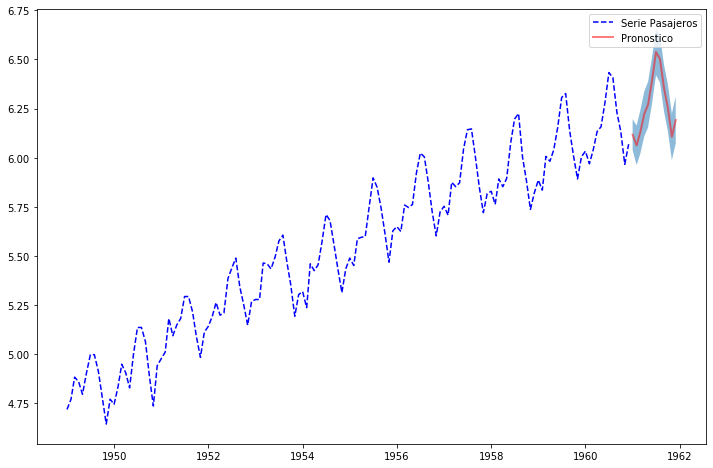

In [33]:
####Note que son los pronosticos de serie sin volver a la escala original
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(logAirPass.astype('float64'), '--', color="blue", label='Serie Pasajeros')
# Pronóstico
ax.plot(pronosticos, lw=2, color="red", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICforecast95.iloc[:, 0], ICforecast95.iloc[:, 1], alpha=0.5)
ax.legend(loc='upper right')
plt.draw()

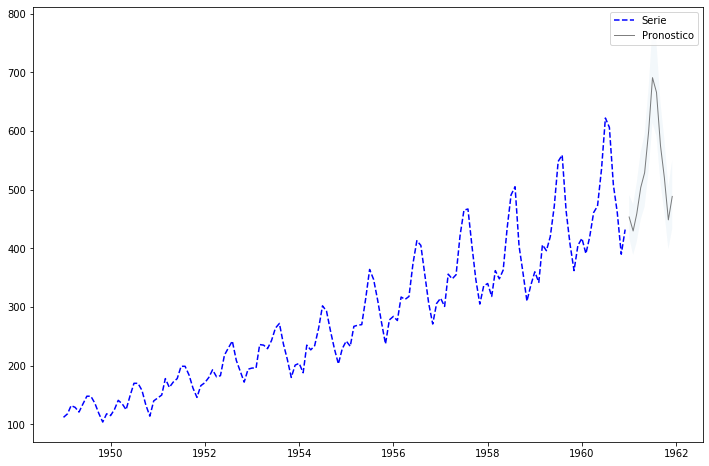

In [34]:
###Reescalar#####
pronosticos_inboxcox=sp.special.inv_boxcox(np.array(pronosticos[0:]),0)
ICinfforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,0]),0)
ICsupforecast95_invbox=sp.special.inv_boxcox(np.array(ICforecast95.iloc[:,1]),0)
pronosticos_inboxcox=pd.Series(pronosticos_inboxcox,index=pronosticos.index)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Serie actual
ax.plot(tsAirP.astype('float64'), '--', color="blue", label='Serie')
# Pronóstico
ax.plot(pronosticos_inboxcox, lw=1, color="black", alpha=0.5, label='Pronostico')
ax.fill_between(pronosticos.index, ICinfforecast95_invbox, ICsupforecast95_invbox, alpha=0.05)
ax.legend(loc='upper right')
plt.draw()